# 19BCE077 ML PRACTICAL 4

# Multivariate with Gradient Decent with Regularization

In [10]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv, pinv, LinAlgError
import matplotlib.pyplot as plt

X, y = datasets.load_boston(return_X_y=True)

X_train_temp1=X[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)
y_train=y[0:400]

X_test_temp1=X[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)
y_test=y[400:506]

scaler=StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:]=scaler.transform(X_train[:,1:])
X_test[:,1:]=scaler.transform(X_test[:,1:])

Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 14)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 14)


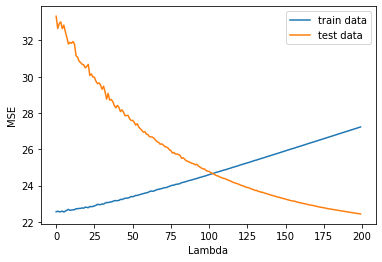

In [15]:
lambda_values = []
error_values_test = []
error_values_train = []

for lambda1 in range(0,200):
    lambda_values.append(lambda1)
    theta = np.random.uniform(0,1,size = X_train.shape[1])
    niteration = 1000
    learning_rate = 0.01

    m = X_train.shape[0]
    n = X_train.shape[1]

    for i in range(niteration):
        update = np.zeros(X_train.shape[1])
        y_pred = np.dot(X_train,theta)
        error = y_pred - y_train
        for j in range(n) :
            update[j] = np.sum(error*(X_train.T)[j])
        theta[0] = theta[0] - (1/m)*learning_rate*update[0]
        theta[1:] = theta[1:]*(1-(learning_rate*lambda1/m)) - (1/m)*learning_rate*update[1:]

    train_predictions = np.dot(X_train, theta)
    train_mae = metrics.mean_absolute_error(y_true=y_train, y_pred=train_predictions)
    train_mse = metrics.mean_squared_error(y_true=y_train, y_pred=train_predictions)
    
    test_predictions = np.dot(X_test, theta)
    test_mae = metrics.mean_absolute_error(y_true=y_test, y_pred=test_predictions)
    test_mse = metrics.mean_squared_error(y_true=y_test, y_pred=test_predictions)
    
    error_values_test.append(test_mse)
    error_values_train.append(train_mse)
    
plt.plot(lambda_values, error_values_train, label="train data")
plt.plot(lambda_values, error_values_test, label="test data")
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Multivariate with Normal Equation Method with Regularization

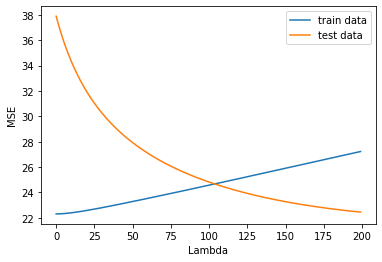

In [16]:
lambda_values = []
error_values_test = []
error_values_train = []

for lambda1 in range(0,200):
    lambda_values.append(lambda1)
    side_matrix = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(1,X_train.shape[1]):
        side_matrix[i,i]=lambda1

    theta = np.zeros(X_train.shape[1])

    try:
        XTXi = inv(np.dot(X_train.T, X_train) + side_matrix)
    except:
        XTXi = pinv(np.dot(X_train.T, X_train) + side_matrix)

    XTy = np.dot(X_train.T, y_train)

    theta = np.dot(XTXi, XTy)
    
    train_predictions = np.dot(X_train, theta)
    train_mae = metrics.mean_absolute_error(y_true=y_train, y_pred=train_predictions)
    train_mse = metrics.mean_squared_error(y_true=y_train, y_pred=train_predictions)
    
    test_predictions = np.dot(X_test, theta)
    test_mae = metrics.mean_absolute_error(y_true=y_test, y_pred=test_predictions)
    test_mse = metrics.mean_squared_error(y_true=y_test, y_pred=test_predictions)
    
    error_values_test.append(test_mse)
    error_values_train.append(train_mse)
    
plt.plot(lambda_values, error_values_train, label="train data")
plt.plot(lambda_values, error_values_test, label="test data")
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()